In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)  # 10 classes (digits 0-9)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)


Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.3717 - accuracy: 0.8943 - val_loss: 0.1705 - val_accuracy: 0.9514
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1466 - accuracy: 0.9561 - val_loss: 0.1225 - val_accuracy: 0.9651
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9693 - val_loss: 0.1135 - val_accuracy: 0.9668
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9772 - val_loss: 0.0985 - val_accuracy: 0.9704
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9824 - val_loss: 0.0891 - val_accuracy: 0.9718
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.1025 - val_accuracy: 0.9703
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.9889 - val_loss: 0.0890 - val_accuracy: 0.9739
Epoch 

313/313 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9752
Test accuracy: 97.52%


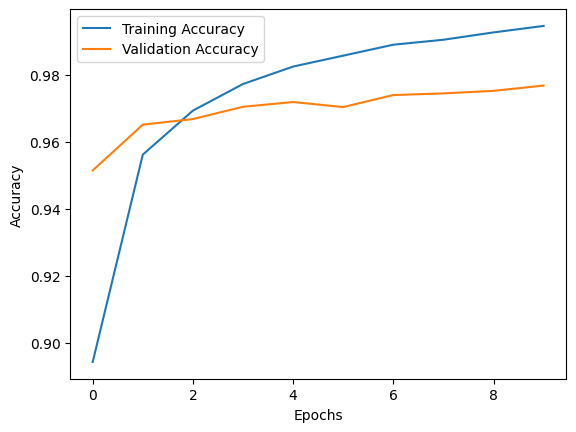

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 70ms/step


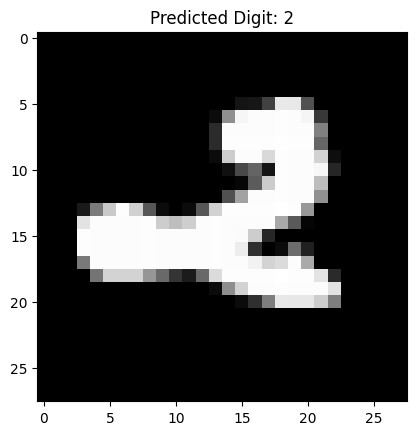

In [6]:
# Choose a random test image
random_index = np.random.randint(0, len(x_test))
test_image = x_test[random_index]

# Make a prediction
predicted_digit = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# Display the test image and the predicted digit
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()
